In [35]:
import pandas as pd 
import plotly.express as px
import seaborn as sb
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
iris_df = px.data.iris()
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [52]:
X = iris_df.loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width"]]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [53]:
y = iris_df.loc[:, "species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [56]:
#add feature name
principalDf = pd.DataFrame(data = principalComponents, 
                               columns = ['PC1', 'PC2'])
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,PC1,PC2,species
0,-2.264542,0.505704,setosa
1,-2.086426,-0.655405,setosa
2,-2.367950,-0.318477,setosa
3,-2.304197,-0.575368,setosa
4,-2.388777,0.674767,setosa
...,...,...,...
145,1.870522,0.382822,virginica
146,1.558492,-0.905314,virginica
147,1.520845,0.266795,virginica
148,1.376391,1.016362,virginica


In [57]:
pca_1_percent = round((pca.explained_variance_ratio_[0] * 100),2)
pca_2_percent = round((pca.explained_variance_ratio_[1] * 100),2)

In [61]:
components = pd.DataFrame(data = np.transpose(pca.components_), columns = ['x', 'y'])    
X = px.data.iris().loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width"]]
components["condition"] = list(X.columns)
components

,x,y,condition
0,0.522372,0.372318,sepal_length
1,-0.263355,0.925556,sepal_width
2,0.581254,0.021095,petal_length
3,0.565611,0.065416,petal_width


In [62]:
#determine range for x and y axis, not mandatory, but I like my PCA plots as a square
range_list = []

range_list.append(finalDf["PC1"].max())
range_list.append(finalDf["PC1"].min())
range_list.append(finalDf["PC2"].max())
range_list.append(finalDf["PC2"].min())

max_number = max(range_list)+1
min_number = min(range_list)-1

title_string = "PCA plot"
number_of_variables = iris_df.shape[0]

In [98]:
fig = px.scatter(finalDf, 
                     x='PC1', 
                     y='PC2', 
                     color=finalDf["species"],
                     #symbol=finalDf['species'],
                     color_discrete_sequence=["#E11E26", 
                                              "#397EB8", 
                                              "#984F9E"], 
                     labels={"PC1": "PC1 ({}%)".format(pca_1_percent),
                             "PC2": "PC2 ({}%)".format(pca_2_percent),
                             "species": "Species"},
                     title=title_string+" ("+str(number_of_variables)+" variables)",
                     template="plotly_white",
                     )

#updates the range of x and y axis    
fig.update_xaxes(dtick=1, range=[min_number, max_number])
fig.update_yaxes(dtick=1, range=[min_number, max_number])

#determines if border of plot should be shown
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

#determines gridlines details
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')

#determines how zerolines hsould be displayed
fig.update_xaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')
fig.update_yaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')

#updates size of feature points in plot
fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers')) 

#specifies layout details
fig.update_layout(height=700, 
                  width=800, 
                  showlegend=True, 
                  legend_title_text='Species',
                  font=dict(
                        family="Courier New, monospace",
                        size=18,
                        color="black"),
                  title_x=0.22)

#add components dir
n = components.shape[0]
for i in range(n):
    fig.add_annotation(x= 0, # arrows' head
                       y= 0,  # arrows' head
                       ax=components.iloc[i,0] * 3,  # arrows' tail
                       ay=components.iloc[i,1] * 3,  # arrows' tail
                       xref='x',
                       yref='y',
                       axref='x',
                       ayref='y',
                       text=components.iloc[i,2],  
                       showarrow=True,
                       arrowhead=3,
                       arrowsize=1,
                       arrowwidth=1,
                       arrowcolor='red',
                       opacity=0.6,
                       arrowside='start')
fig.show()
fig.write_html("pca_plot_iris_data.html")

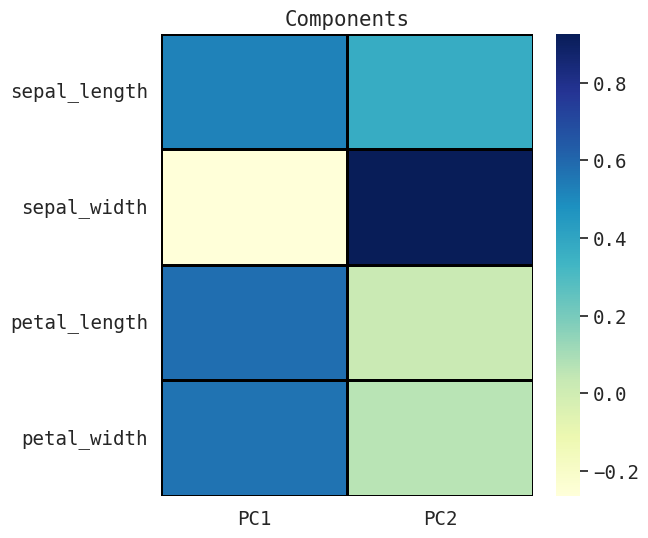

In [114]:
components_heatmap = components.set_index("condition")
components_heatmap.columns = ["PC1", "PC2"]

plt.figure(figsize=(6,6))
sb.set(font="monospace", font_scale=1.25)
sb.heatmap(components_heatmap,
                cmap='YlGnBu',
                linewidths=1,
                linecolor="black").set(title='Components', ylabel=None)
plt.show()